In [11]:
import pandas as pd
import requests
import io
import numpy as np
from datetime import datetime
import matplotlib
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [17]:
df = pd.read_csv('YFT_clean.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264097 entries, 0 to 264096
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Weight  264097 non-null  float64       
 1   Date    264097 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 MB
None


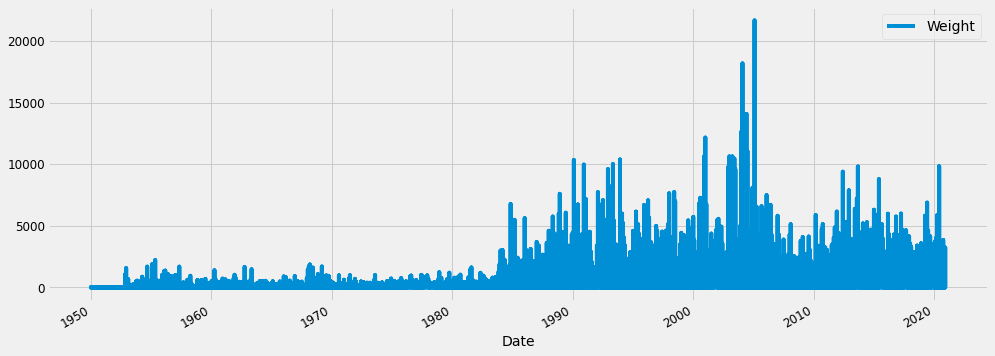

In [13]:
catch = df.set_index('Date')
catch.plot(figsize=(15, 6))
plt.show()

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(catch, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None